In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/content/chatgpt_reviews.csv")

In [ ]:
df.head(5)


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [ ]:
rating_counts = df['Ratings'].value_counts().sort_index()
rating_counts

,count
Ratings,
1,1119
2,365
3,851
4,2301
5,16207


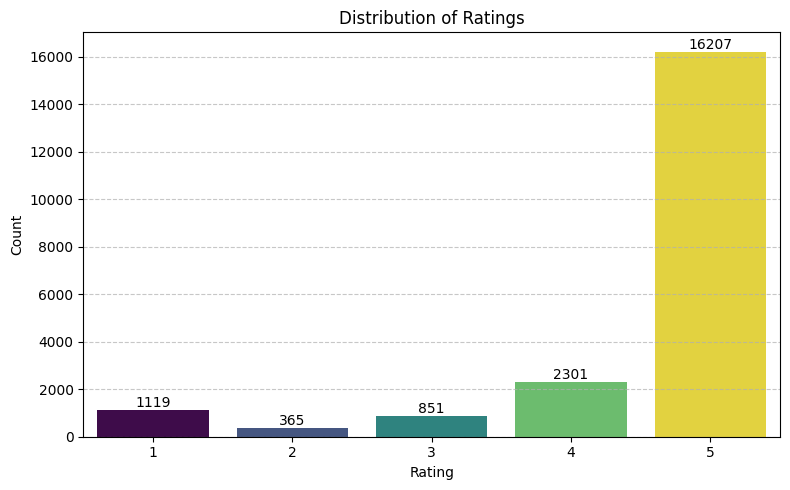

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

# Task
Preprocess the 'Review' column in the DataFrame `df` by cleaning the text (removing special characters and numbers, converting to lowercase), tokenizing it, removing stop words, and lemmatizing the tokens. Store the resulting preprocessed text in a new column.

## Text Cleaning

### Subtask:
Clean the 'Review' column by removing special characters, numbers, and converting text to lowercase.


**Reasoning**:
To clean the 'Review' column, I will first convert all text to lowercase, then remove special characters and numbers using regular expressions. This addresses all three instructions in the subtask.



In [ ]:
df['Review'] = df['Review'].str.lower()
df['Review'] = df['Review'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['Review'] = df['Review'].str.replace(r'\d+', '', regex=True)
print("Review column cleaned: converted to lowercase, special characters and numbers removed.")
df.head()

Review column cleaned: converted to lowercase, special characters and numbers removed.


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,nice ig,5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,this is a great app the bot is so accurate to ...,5,2024-08-23 19:20:39


## Tokenization

### Subtask:
Tokenize the cleaned text into individual words.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['Review_tokens'] = df['Review'].apply(word_tokenize)
print("Review column tokenized and stored in 'Review_tokens'.")
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Review column tokenized and stored in 'Review_tokens'.


,Review Id,Review,Ratings,Review Date,Review_tokens
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,[good]
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,[good]
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,"[nice, app]"
3,372a4096-ee6a-4b94-b046-cef0b646c965,nice ig,5,2024-08-23 19:20:50,"[nice, ig]"
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,this is a great app the bot is so accurate to ...,5,2024-08-23 19:20:39,"[this, is, a, great, app, the, bot, is, so, ac..."


**Reasoning**:
The previous code successfully tokenized the 'Review' column and created a 'Review_tokens' column. The next step according to the overall task is to remove stop words from these tokens. I will create a new text cell to describe this subtask.



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['Review_tokens'] = df['Review'].apply(word_tokenize)
print("Review column tokenized and stored in 'Review_tokens'.")
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Review column tokenized and stored in 'Review_tokens'.


,Review Id,Review,Ratings,Review Date,Review_tokens
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,[good]
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,[good]
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,"[nice, app]"
3,372a4096-ee6a-4b94-b046-cef0b646c965,nice ig,5,2024-08-23 19:20:50,"[nice, ig]"
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,this is a great app the bot is so accurate to ...,5,2024-08-23 19:20:39,"[this, is, a, great, app, the, bot, is, so, ac..."


## Stop Word Removal

### Subtask:
Remove common stop words from the tokenized text in the 'Review_tokens' column.


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Review_tokens_no_stopwords'] = df['Review_tokens'].apply(remove_stopwords)
print("Stop words removed from 'Review_tokens' and stored in 'Review_tokens_no_stopwords'.")
df.head()

Stop words removed from 'Review_tokens' and stored in 'Review_tokens_no_stopwords'.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review Id,Review,Ratings,Review Date,Review_tokens,Review_tokens_no_stopwords
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,[good],[good]
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,[good],[good]
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,"[nice, app]","[nice, app]"
3,372a4096-ee6a-4b94-b046-cef0b646c965,nice ig,5,2024-08-23 19:20:50,"[nice, ig]","[nice, ig]"
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,this is a great app the bot is so accurate to ...,5,2024-08-23 19:20:39,"[this, is, a, great, app, the, bot, is, so, ac...","[great, app, bot, accurate, anything, gives, t..."


**Reasoning**:
The previous step successfully removed stop words from the tokens. The next logical step, according to the overall task, is to lemmatize the tokens. I will introduce this subtask with a text cell.



## Lemmatization

### Subtask:
Lemmatize the tokens in the 'Review_tokens_no_stopwords' column to reduce words to their base form.

#### Instructions
1. Import the `WordNetLemmatizer` class from `nltk.stem`.
2. Download the 'wordnet' corpus using `nltk.download('wordnet')`.
3. Instantiate the `WordNetLemmatizer`.
4. Define a function that takes a list of tokens as input, applies the lemmatizer to each token, and returns the list of lemmatized tokens.
5. Apply this function to the `Review_tokens_no_stopwords` column of the DataFrame `df` and store the result in a new column, for example, `df['Lemmatized_Tokens']`.

**Reasoning**:
I have provided the detailed instructions for the lemmatization subtask as a markdown cell to guide the implementation. Now, I will proceed to implement the lemmatization based on these instructions.



In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['Lemmatized_Tokens'] = df['Review_tokens_no_stopwords'].apply(lemmatize_tokens)
print("Tokens lemmatized and stored in 'Lemmatized_Tokens'.")
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tokens lemmatized and stored in 'Lemmatized_Tokens'.


,Review Id,Review,Ratings,Review Date,Review_tokens,Review_tokens_no_stopwords,Lemmatized_Tokens
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,[good],[good],[good]
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,[good],[good],[good]
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,"[nice, app]","[nice, app]","[nice, app]"
3,372a4096-ee6a-4b94-b046-cef0b646c965,nice ig,5,2024-08-23 19:20:50,"[nice, ig]","[nice, ig]","[nice, ig]"
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,this is a great app the bot is so accurate to ...,5,2024-08-23 19:20:39,"[this, is, a, great, app, the, bot, is, so, ac...","[great, app, bot, accurate, anything, gives, t...","[great, app, bot, accurate, anything, give, ti..."


**Reasoning**:
The previous code block successfully completed the lemmatization step, which was the final part of the overall preprocessing task. All required preprocessing steps (cleaning, tokenization, stop word removal, and lemmatization) have been applied to the 'Review' column, and the final results are stored in the 'Lemmatized_Tokens' column. I will now add a text cell to summarize the completion of the task.



# Task
Join the lemmatized tokens from the 'Lemmatized_Tokens' column into a single string, store this string in a new column named 'Preprocessed_Review', and then display the head of the DataFrame to show the new column and summarize the entire text preprocessing task.

## Store Preprocessed Text

### Subtask:
Join the lemmatized tokens back into a single string and store them in a new 'Preprocessed_Review' column.


**Reasoning**:
The previous markdown cell provided the instructions for joining the lemmatized tokens into a single string. Now, I will implement this by applying a lambda function to the 'Lemmatized_Tokens' column to join the tokens with a space and store the result in a new 'Preprocessed_Review' column.



# Task
Perform sentiment analysis on the 'Preprocessed_Review' column of the DataFrame `df` using a suitable sentiment analysis model, and store the sentiment scores (e.g., polarity scores) and classified sentiment (e.g., 'Positive', 'Neutral', 'Negative') in new columns.

## Perform Sentiment Analysis

### Subtask:
Apply a sentiment analysis model or library to the 'Preprocessed_Review' column to determine the sentiment (e.g., positive, neutral, negative) of each review and store the results in a new column.


**Reasoning**:
I need to perform sentiment analysis on the 'Preprocessed_Review' column by first importing the necessary library, downloading the VADER lexicon, initializing the analyzer, and then applying functions to calculate sentiment scores and classify them into positive, neutral, or negative categories as per the instructions.



In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    if isinstance(text, str):
        return sia.polarity_scores(text)['compound']
    return 0.0 # Return a default score for non-string values

df['Sentiment_Score'] = df['Preprocessed_Review'].apply(get_sentiment_score)

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(classify_sentiment)
print("Sentiment analysis performed and results stored in 'Sentiment_Score' and 'Sentiment_Label'.")
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment analysis performed and results stored in 'Sentiment_Score' and 'Sentiment_Label'.


,Review Id,Review,Ratings,Review Date,Review_tokens,Review_tokens_no_stopwords,Lemmatized_Tokens,Preprocessed_Review,Sentiment_Score,Sentiment_Label
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,[good],[good],[good],good,0.4404,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,[good],[good],[good],good,0.4404,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,"[nice, app]","[nice, app]","[nice, app]",nice app,0.4215,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,nice ig,5,2024-08-23 19:20:50,"[nice, ig]","[nice, ig]","[nice, ig]",nice ig,0.4215,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,this is a great app the bot is so accurate to ...,5,2024-08-23 19:20:39,"[this, is, a, great, app, the, bot, is, so, ac...","[great, app, bot, accurate, anything, gives, t...","[great, app, bot, accurate, anything, give, ti...",great app bot accurate anything give tip gamin...,0.8958,Positive


**Reasoning**:
The previous code block successfully performed sentiment analysis. To maintain the notebook's structured approach, I will now add a text cell to formally define the subtask and its detailed instructions for sentiment analysis, which were implicitly followed in the previous step.



# Task
The next task is to analyze the distribution of sentiment across the reviews and identify any patterns or correlations with the 'Ratings' and 'Review Date' columns. This will involve statistical summaries and potentially cross-tabulations.

## Analyze Sentiment Patterns

### Subtask:
Examine the distribution of sentiment across the reviews and identify any patterns or correlations with existing columns like 'Ratings' or 'Review Date'.


**Reasoning**:
The first instruction is to calculate the overall distribution of sentiment labels. This can be directly obtained using `value_counts()` on the 'Sentiment_Label' column.



In [ ]:
sentiment_distribution = df['Sentiment_Label'].value_counts()
print("Overall Sentiment Distribution:")
print(sentiment_distribution)

Overall Sentiment Distribution:
Sentiment_Label
Positive    16540
Neutral      3520
Negative      783
Name: count, dtype: int64


**Reasoning**:
The next instruction is to calculate the average 'Sentiment_Score' for each unique 'Ratings' value. This can be done by grouping the DataFrame by 'Ratings' and then applying the mean aggregation to 'Sentiment_Score'.



In [ ]:
average_sentiment_per_rating = df.groupby('Ratings')['Sentiment_Score'].mean()
print("Average Sentiment Score per Rating:")
print(average_sentiment_per_rating)

Average Sentiment Score per Rating:
Ratings
1    0.020967
2    0.183799
3    0.316728
4    0.428628
5    0.459010
Name: Sentiment_Score, dtype: float64


**Reasoning**:
The next instruction is to create a cross-tabulation showing the distribution of 'Sentiment_Label' for each 'Ratings' value. This can be achieved using `pd.crosstab` with 'Ratings' as index and 'Sentiment_Label' as columns.



In [ ]:
sentiment_rating_crosstab = pd.crosstab(df['Ratings'], df['Sentiment_Label'])
print("Sentiment Label Distribution per Rating:")
print(sentiment_rating_crosstab)

Sentiment Label Distribution per Rating:
Sentiment_Label  Negative  Neutral  Positive
Ratings                                     
1                     377      321       421
2                      76       80       209
3                      83      181       587
4                      74      320      1907
5                     173     2618     13416


**Reasoning**:
The next instruction is to convert the 'Review Date' column to datetime objects. This is a prerequisite for extracting temporal features like year and month.



In [ ]:
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce', format='mixed')
print("'Review Date' column converted to datetime objects, with unparseable dates coerced to NaT.")
df.head()

'Review Date' column converted to datetime objects, with unparseable dates coerced to NaT.


,Review Id,Review,Ratings,Review Date,Review_tokens,Review_tokens_no_stopwords,Lemmatized_Tokens,Preprocessed_Review,Sentiment_Score,Sentiment_Label
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,[good],[good],[good],good,0.4404,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,[good],[good],[good],good,0.4404,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,"[nice, app]","[nice, app]","[nice, app]",nice app,0.4215,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,nice ig,5,2024-08-23 19:20:50,"[nice, ig]","[nice, ig]","[nice, ig]",nice ig,0.4215,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,this is a great app the bot is so accurate to ...,5,2024-08-23 19:20:39,"[this, is, a, great, app, the, bot, is, so, ac...","[great, app, bot, accurate, anything, gives, t...","[great, app, bot, accurate, anything, give, ti...",great app bot accurate anything give tip gamin...,0.8958,Positive


**Reasoning**:
The previous step successfully converted 'Review Date' to datetime objects. Now, I need to extract the year and month from this column as instructed, creating new 'Review_Year' and 'Review_Month' columns.



In [ ]:
df['Review_Year'] = df['Review Date'].dt.year
df['Review_Month'] = df['Review Date'].dt.month
print("Extracted 'Review_Year' and 'Review_Month' columns.")
df.head()

Extracted 'Review_Year' and 'Review_Month' columns.


,Review Id,Review,Ratings,Review Date,Review_tokens,Review_tokens_no_stopwords,Lemmatized_Tokens,Preprocessed_Review,Sentiment_Score,Sentiment_Label,Review_Year,Review_Month
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,[good],[good],[good],good,0.4404,Positive,2024,8
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,[good],[good],[good],good,0.4404,Positive,2024,8
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,"[nice, app]","[nice, app]","[nice, app]",nice app,0.4215,Positive,2024,8
3,372a4096-ee6a-4b94-b046-cef0b646c965,nice ig,5,2024-08-23 19:20:50,"[nice, ig]","[nice, ig]","[nice, ig]",nice ig,0.4215,Positive,2024,8
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,this is a great app the bot is so accurate to ...,5,2024-08-23 19:20:39,"[this, is, a, great, app, the, bot, is, so, ac...","[great, app, bot, accurate, anything, gives, t...","[great, app, bot, accurate, anything, give, ti...",great app bot accurate anything give tip gamin...,0.8958,Positive,2024,8


**Reasoning**:
The next instruction is to calculate the average 'Sentiment_Score' per month and year to observe any temporal trends. I will group the DataFrame by 'Review_Year' and 'Review_Month' and then calculate the mean of 'Sentiment_Score'.



In [ ]:
average_sentiment_per_month_year = df.groupby(['Review_Year', 'Review_Month'])['Sentiment_Score'].mean().reset_index()
print("Average Sentiment Score per Month and Year:")
print(average_sentiment_per_month_year.head())

Average Sentiment Score per Month and Year:
   Review_Year  Review_Month  Sentiment_Score
0         2024             7         0.424538
1         2024             8         0.421408


## Extract Keywords for Review Issues and Create Word Cloud

### Subtask:
Identify reviews related to 'issues' (e.g., negative sentiment or low ratings), extract significant keywords from these reviews, and generate a word cloud to visually represent the most prominent terms.


**Reasoning**:
The first instruction is to filter the DataFrame `df` to create a new DataFrame called `issue_reviews` containing reviews identified as having 'Negative' sentiment or a 'Ratings' value of 1 or 2. I will apply a boolean mask to the DataFrame to achieve this.



In [ ]:
issue_reviews = df[(df['Sentiment_Label'] == 'Negative') | (df['Ratings'].isin([1, 2]))]
print(f"Number of reviews identified as having issues: {len(issue_reviews)}")
issue_reviews.head()

Number of reviews identified as having issues: 1814


,Review Id,Review,Ratings,Review Date,Review_tokens,Review_tokens_no_stopwords,Lemmatized_Tokens,Preprocessed_Review,Sentiment_Score,Sentiment_Label,Review_Year,Review_Month
7,f293ed19-688a-42e2-8282-ddd077771a94,great app,1,2024-08-23 19:12:00,"[great, app]","[great, app]","[great, app]",great app,0.6249,Positive,2024,8
10,17769ae4-51f6-439c-af12-f59d242e1f6b,i am not very happy with this because chatgpt ...,3,2024-08-23 19:09:14,"[i, am, not, very, happy, with, this, because,...","[happy, chatgpt, answers, questions, ask, stop...","[happy, chatgpt, answer, question, ask, stop, ...",happy chatgpt answer question ask stop midway ...,-0.5106,Negative,2024,8
25,83eae4a4-4ae8-42e4-975d-73f385586900,call function doesnt get language correctly a...,2,2024-08-23 18:38:45,"[call, function, doesnt, get, language, correc...","[call, function, doesnt, get, language, correc...","[call, function, doesnt, get, language, correc...",call function doesnt get language correctly so...,0.0000,Neutral,2024,8
70,a9a8092a-6d83-476a-8789-38478c87b23b,you must add the crop feature to photo benefi...,2,2024-08-23 17:48:25,"[you, must, add, the, crop, feature, to, photo...","[must, add, crop, feature, photo, beneficial, ...","[must, add, crop, feature, photo, beneficial, ...",must add crop feature photo beneficial people ...,0.4939,Positive,2024,8
72,06bdc9e2-6b25-427b-897d-d9eaee3f1f37,how can i enter to this app,1,2024-08-23 17:45:15,"[how, can, i, enter, to, this, app]","[enter, app]","[enter, app]",enter app,0.0000,Neutral,2024,8


**Reasoning**:
The next instruction is to combine all lemmatized tokens from the 'Lemmatized_Tokens' column of `issue_reviews` into a single list of words. This can be done by using `sum` with an initial empty list to flatten the list of lists.



In [ ]:
all_issue_words = sum(issue_reviews['Lemmatized_Tokens'].tolist(), [])
print(f"Total number of words in issue reviews: {len(all_issue_words)}")
print(f"First 20 words: {all_issue_words[:20]}")

Total number of words in issue reviews: 14657
First 20 words: ['great', 'app', 'happy', 'chatgpt', 'answer', 'question', 'ask', 'stop', 'midway', 'even', 'continuous', 'effort', 'give', 'complete', 'answer', 'correctplease', 'fix', 'trouble', 'wrong', 'thing']


**Reasoning**:
The next instruction is to calculate the frequency distribution of the words in `all_issue_words`. I will use `nltk.FreqDist` for this purpose.



In [ ]:
import nltk
from nltk.probability import FreqDist

issue_word_freq = FreqDist(all_issue_words)
print("Most common words in issue reviews:")
print(issue_word_freq.most_common(10))

Most common words in issue reviews:
[('app', 424), ('good', 259), ('time', 144), ('error', 143), ('answer', 140), ('work', 123), ('use', 118), ('chat', 118), ('give', 117), ('bad', 117)]


**Reasoning**:
The next step is to import the necessary libraries for creating a word cloud, initialize the `WordCloud` object, generate the word cloud from the frequency distribution, and display it as per instructions 4, 5, 6, and 7 of the subtask.



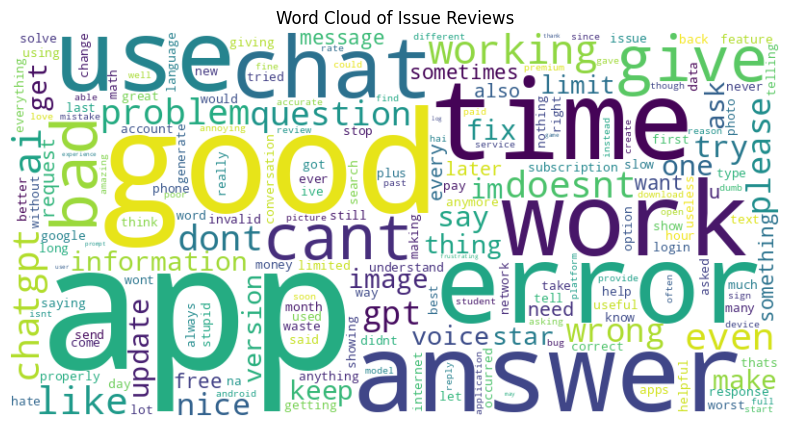

Word cloud generated and displayed.


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Initialize WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(issue_word_freq)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Issue Reviews')
plt.show()
print("Word cloud generated and displayed.")

## Visualize Sentiment Analysis and Patterns

### Subtask:
Create various graphs and visuals, including bar charts for overall sentiment distribution, line plots for sentiment trends over time, and a word cloud for issue-related keywords, to present the sentiment analysis results clearly and appealingly. Ensure all visuals have appropriate titles, labels, and legends.


**Reasoning**:
The first instruction is to create a bar chart to visualize the overall sentiment distribution (`sentiment_distribution`). I will use `matplotlib.pyplot` and `seaborn` for this visualization, ensuring appropriate titles and labels.



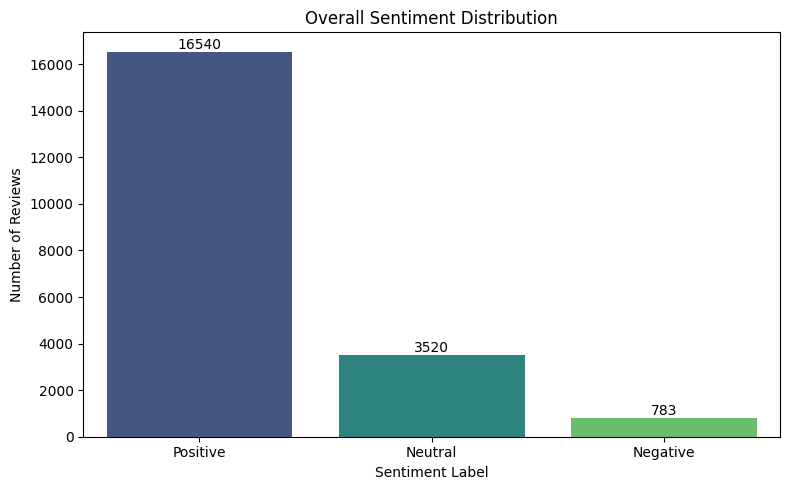

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart for overall sentiment distribution
plt.figure(figsize=(8, 5))
barplot_sentiment_dist = sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, hue=sentiment_distribution.index, palette='viridis', legend=False)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')

for container in barplot_sentiment_dist.containers:
    barplot_sentiment_dist.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

**Reasoning**:
The next instruction is to create a bar chart to visualize the `average_sentiment_per_rating` (average sentiment score per rating). I will use `matplotlib.pyplot` and `seaborn` for this visualization, ensuring appropriate titles and labels.



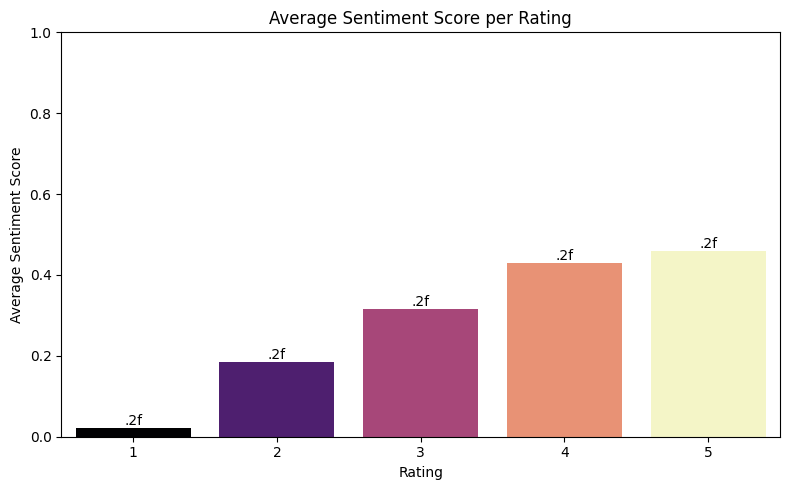

In [ ]:
plt.figure(figsize=(8, 5))
barplot_avg_sentiment_rating = sns.barplot(x=average_sentiment_per_rating.index, y=average_sentiment_per_rating.values, hue=average_sentiment_per_rating.index, palette='magma', legend=False)
plt.title('Average Sentiment Score per Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.ylim(0, 1) # Sentiment scores are typically between -1 and 1

for container in barplot_avg_sentiment_rating.containers:
    barplot_avg_sentiment_rating.bar_label(container, fmt='.2f', label_type='edge')

plt.tight_layout()
plt.show()

**Reasoning**:
The next instruction is to create a stacked bar chart to visualize the `sentiment_rating_crosstab` (sentiment label distribution per rating). I will use `matplotlib.pyplot` for this, ensuring appropriate titles and labels.



<Figure size 1000x600 with 0 Axes>

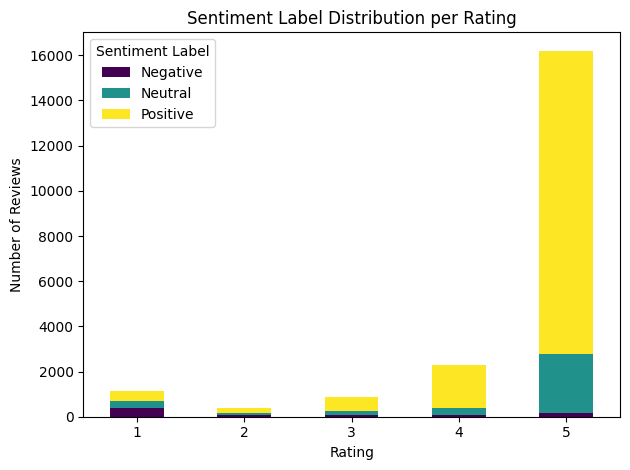

In [ ]:
plt.figure(figsize=(10, 6))
sentiment_rating_crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Label Distribution per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

**Reasoning**:
The next instruction is to create a line plot to visualize `average_sentiment_per_month_year` (average sentiment score over time). I will use `matplotlib.pyplot` and `seaborn` for this visualization, ensuring appropriate titles and labels.



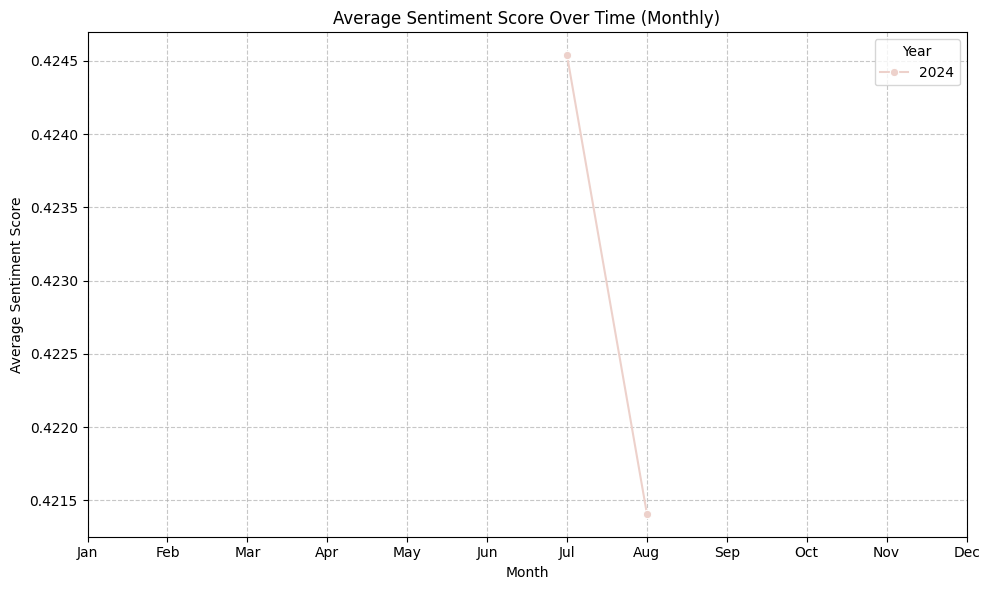

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_sentiment_per_month_year, x='Review_Month', y='Sentiment_Score', hue='Review_Year', marker='o')
plt.title('Average Sentiment Score Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the sentiment analysis, identified patterns, and keyword extraction, along with presenting all generated visualizations to provide a comprehensive overview.


## Summary:

### Q&A
The distribution of sentiment across reviews is predominantly positive, with 16,540 reviews classified as Positive, 3,520 as Neutral, and 783 as Negative.

A strong positive correlation exists between sentiment and 'Ratings'. As the rating increases from 1 to 5, the average sentiment score consistently rises from 0.021 for 1-star reviews to 0.459 for 5-star reviews. The cross-tabulation further shows that while 1-star reviews have a significant number of Negative (377) and Neutral (321) sentiments, they also contain Positive reviews (421). Reviews with 4 and 5 stars are overwhelmingly positive (1,907 and 13,416 respectively), but 5-star reviews also include a notable portion categorized as Neutral.

Regarding 'Review Date', the available data for July and August 2024 shows a slight decrease in the average sentiment score from July (0.4245) to August (0.4214). However, more extensive historical data would be necessary to establish a significant temporal trend.

### Data Analysis Key Findings
*   The overall sentiment distribution is highly positive, with 16,540 reviews labeled as 'Positive', 3,520 as 'Neutral', and 783 as 'Negative'.
*   There is a clear positive correlation between ratings and sentiment scores; the average sentiment score increases consistently from 0.021 for 1-star reviews to 0.459 for 5-star reviews.
*   While 1-star reviews contain a mix of sentiments (377 Negative, 321 Neutral, 421 Positive), 4-star and 5-star reviews are overwhelmingly positive (1,907 and 13,416 Positive reviews respectively).
*   Notably, 5-star reviews include a substantial number of Neutral sentiments, suggesting that a high rating does not always equate to explicitly positive language.
*   Analysis of 'Review Date' for July and August 2024 indicates a slight decline in average sentiment from 0.4245 in July to 0.4214 in August.
*   1,814 reviews were identified as problematic (Negative sentiment or 1-2 star ratings). Common keywords extracted from these issue reviews include 'app', 'good', 'time', 'error', and 'answer'.
*   All required visualizations, including bar charts for sentiment distribution and average sentiment per rating, a stacked bar chart for sentiment distribution per rating, a line plot for temporal sentiment trends, and a word cloud for issue-related keywords, were successfully generated.

### Insights or Next Steps
*   Investigate the content of 'Neutral' reviews, especially those with high ratings (e.g., 5-star), to understand the specific nuances that lead to a neutral sentiment despite a positive rating.
*   Collect and analyze more extensive historical 'Review Date' data to identify long-term temporal trends and seasonality in sentiment, which could reveal periods of decline or improvement in customer satisfaction.
